In [1]:
%matplotlib inline
import ipywidgets as widgets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.widgets as wid
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
'''od = pd.read_csv('..\data\Clean_StockX_Data.csv')
df = od.copy()
df.head()'''
od = pd.read_csv('https://raw.githubusercontent.com/deafkojiro/Yeezy-Analysis/main/data/Clean_StockX_Data.csv')
df = od.copy()

In [3]:
df = df.rename(columns={
    "Order Date": "Order_Date",
    "Sneaker Name": "Sneaker_Name",
    "Sale Price": "Sale_Price",
    "Retail Price": "Retail_Price",
    "Release Date": "Release_Date",
    "Shoe Size": "Shoe_Size",
    "Buyer Region": "Buyer_Region"
    })

import datetime as dt

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Date']=df['Order_Date'].map(dt.datetime.toordinal)

df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date']=df['Release_Date'].map(dt.datetime.toordinal)

In [4]:
df["Brand"] = pd.Categorical(df["Brand"])
df["Brand"] = df["Brand"].cat.codes

%matplotlib widget
fig, ax = plt.subplots(figsize=(6,6))
correlations = df.corr()
sns.heatmap(correlations, annot=True, ax=ax, cmap = 'mako')
plt.yticks(rotation = 0)
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
correlations = df.corr()
sns.heatmap(correlations, annot=True, ax=ax, cmap = 'mako')
plt.yticks(rotation = 0)
plt.show()

%matplotlib widget
sns.boxplot(x='Brand', y='Sale_Price', data=df)
plt.show()

#Average sale price by brand
a = []
labels = df[['Brand', 'Sale_Price']]
brands = ['Yeezy', 'Off-White']
for b in brands:
    row = labels.loc[labels['Brand'] == str(b)]
    a.append(row['Sale_Price'].mean())
print('Yeezy avg price: $' + str(a[0]))
print('Off-White avg price: $' + str(a[1]))

In [5]:
X = df.iloc[:, [3,6]].values

In [6]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

from sklearn.cluster import MiniBatchKMeans
wcss = []
for i in range(1, 11):
    kmeans = MiniBatchKMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

C:\Users\cameron.clark\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


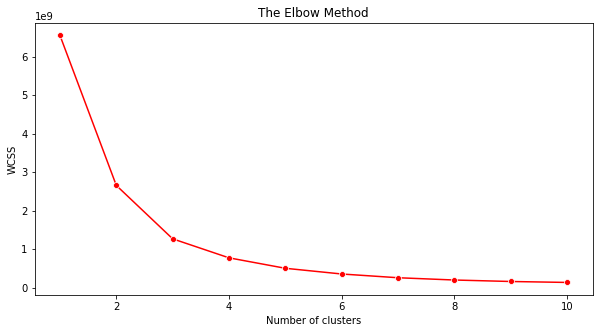

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
km = KMeans(n_clusters=4, random_state=42)
km.fit_predict(X)
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.636


In [11]:
n_clusters=4
km = KMeans(n_clusters=4,init="k-means++", random_state=42)
km.fit(X)
cluster_labels = km.predict(X)

#Calculate the average of silhouette scores
silhouette_avg = silhouette_score(X,cluster_labels)

#Calculate the silhouette score for each data
each_silhouette_score = silhouette_samples(X,cluster_labels,metric="euclidean")

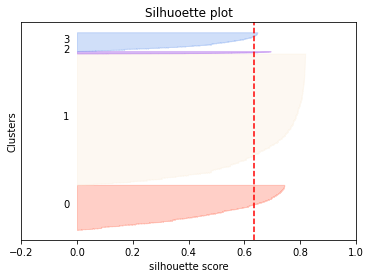

In [12]:
colorlist =["tomato","antiquewhite","blueviolet","cornflowerblue","darkgreen","seashell","skyblue","mediumseagreen"]
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower =10
for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)
    
    #label the silhouse plots with their cluster numbers at the middle
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))
    
    #compute the new y_lower for next plot
    y_lower = y_upper +10 
    
ax.set_title("Silhuoette plot")
ax.set_xlabel("silhouette score")
ax.set_ylabel("Clusters")
    
#the vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    
ax.set_yticks([])
ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

In [13]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\cameron.clark\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cameron.clark\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cameron.clark\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

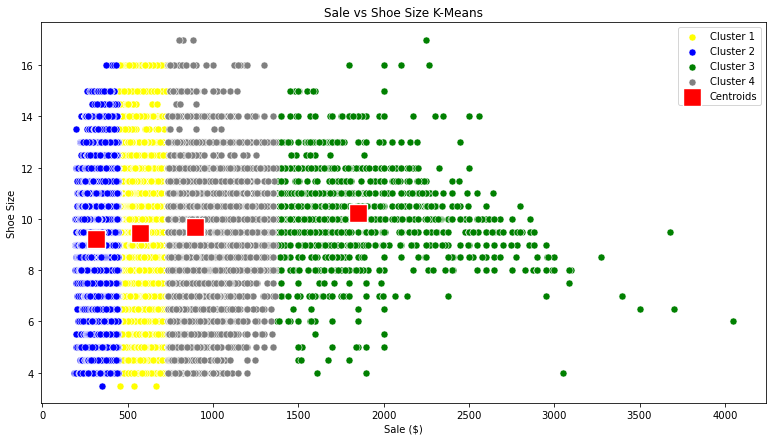

In [14]:
plt.figure(figsize=(13,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Sale vs Shoe Size K-Means')
plt.xlabel('Sale ($)')
plt.ylabel('Shoe Size')
plt.legend()
plt.show()

C:\Users\cameron.clark\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


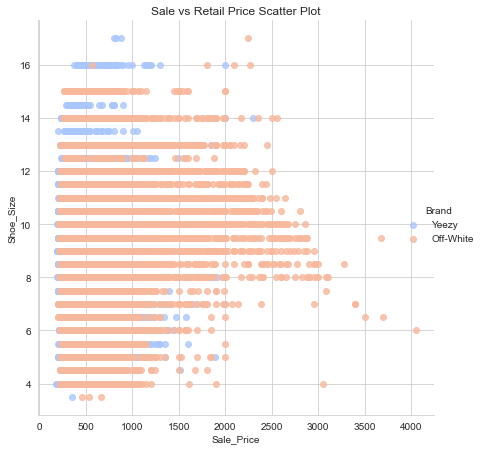

In [15]:
sns.set_style('whitegrid')
g=sns.lmplot('Sale_Price','Shoe_Size',data=df, hue='Brand',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)
plt.title('Sale vs Retail Price Scatter Plot')
legend = g._legend
legend.set_title("Brand")
for t, l in zip(legend.texts,("Yeezy", "Off-White")):
    t.set_text(l)